# Example Notebook on how to use flarenet

In [1]:
%matplotlib widget

In [2]:
import pandas as pd
from astropy.io import ascii
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from flarenet.utils import normalize_flux
from sklearn.preprocessing import RobustScaler
from tqdm import tqdm

/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/nthom/.lightkurve/cache. Please move all the files in the legacy directory /Users/nthom/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import flarenet
flarenet.__path__

['/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet']

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from sklearn.model_selection import RandomizedSearchCV

In [6]:
tf.config.list_physical_devices('GPU')

[]

## Create the training data

Note the training dataset is built off of 'quiet flares' which vera vetted by eye. The TIC and sectors are stored in:
flarenet/supplemental_files/ids_sectors_quietlcs.txt

In [130]:
'''def make_injected_flare_trainingset(num_lcs : int = 1, 
                                    save_plots : bool = False,
                                    flare_frac : float = 0.1,
                                    output_dir : str = "training_data/injected_flares/",
                                    add_pulsation : bool = False,
                                    add_rrlyrae : bool = False,
                                    ):'''

# I ran this 3 times, once with injecting flares (and an 'asteroid'), 
#    one with additional pulsations, and one with rr lyrae-like variability for a total of 30 lightcurves
#    Each lightkurve is broken up into 2 orbits, so it is actually 60 training files total 


flarenet.make_injected_flare_trainingset(num_lcs=10, save_plots=True)  #, add_rrlyrae=True)

Creating flares for 4743939 Sector 49


/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: overflow encountered in exp
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: invalid value encountered in multiply
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:26: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:25: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2


Creating flares for 271723402 Sector 35


/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: overflow encountered in exp
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: invalid value encountered in multiply
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:26: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:25: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2


Creating flares for 18310799 Sector 44


/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:26: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:25: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: overflow encountered in exp
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: invalid value encountered in multiply
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)


Creating flares for 284763085 Sector 50


/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: overflow encountered in exp
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: invalid value encountered in multiply
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:26: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:25: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2


Creating flares for 294205275 Sector 32


/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:26: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:25: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: overflow encountered in exp
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: invalid value encountered in multiply
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)


Creating flares for 8502091 Sector 52


/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:26: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:25: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: overflow encountered in exp
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: invalid value encountered in multiply
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)


Creating flares for 288603254 Sector 57


/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:26: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:25: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: overflow encountered in exp
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: invalid value encountered in multiply
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)


Creating flares for 237100197 Sector 40


/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:26: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:25: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: overflow encountered in exp
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: invalid value encountered in multiply
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)


Creating flares for 334299463 Sector 59


/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:26: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:25: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: overflow encountered in exp
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: invalid value encountered in multiply
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)


Creating flares for 232641526 Sector 55


/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:26: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:25: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: overflow encountered in exp
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: invalid value encountered in multiply
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)


/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:26: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:25: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: overflow encountered in exp
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: invalid value encountered in multiply
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)


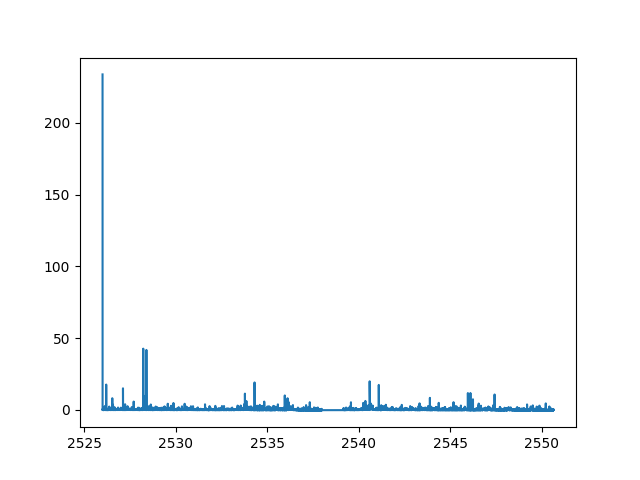

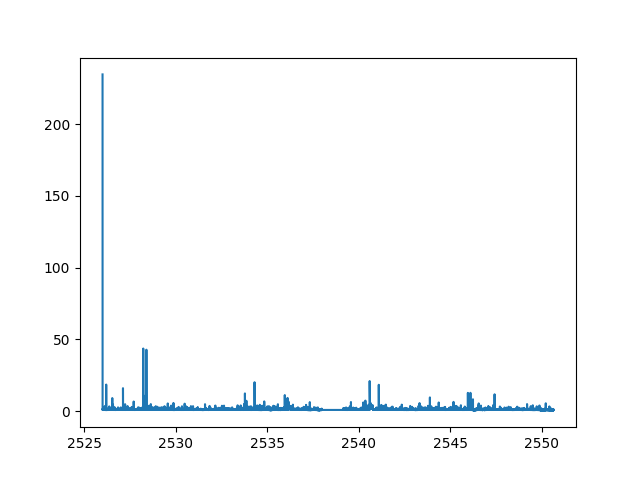

In [118]:
# This is ust an example what a lc with added pulsations looks like
mytpf = flarenet.TessStar("TIC 61101267", sector=45, exptime=20, download_dir='tpfs/')
mytpf.get_metadata()
flares, params = mytpf.generate_flares(flare_fraction=0.1) 

threshold = (mytpf.lc_std / np.nanmedian(mytpf.lc.flux)).value
mytpf.get_flareArr(flares, threshold=threshold) 

mytpf.inject_flares(flares) # inject them onto the lc

#Plot before pulsations
fig, ax = plt.subplots(1)
plt.plot(mytpf.lc.time.value, mytpf.flux_with_flares)
plt.show()

mytpf.inject_stellar_pulsations()
# Plot after pulsations
fig, ax = plt.subplots(1)
plt.plot(mytpf.lc.time.value, mytpf.flux_with_flares)
plt.show()

/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:26: RuntimeWarning: overflow encountered in exp
  * np.exp(-D2 * t+ ((B / C) + (D2 * C / 2)) ** 2) * special.erfc(((B - t) / C) + (C * D2 / 2)))
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:25: RuntimeWarning: invalid value encountered in multiply
  * special.erfc(((B - t) / C) + (C * D1 / 2))) + ((1 / 2) * np.sqrt(np.pi) * A * C * f2
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: overflow encountered in exp
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)
/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/flare_model.py:24: RuntimeWarning: invalid value encountered in multiply
  eqn = ((1 / 2) * np.sqrt(np.pi) * A * C * f1 * np.exp(-D1 * t + ((B / C) + (D1 * C / 2)) ** 2)


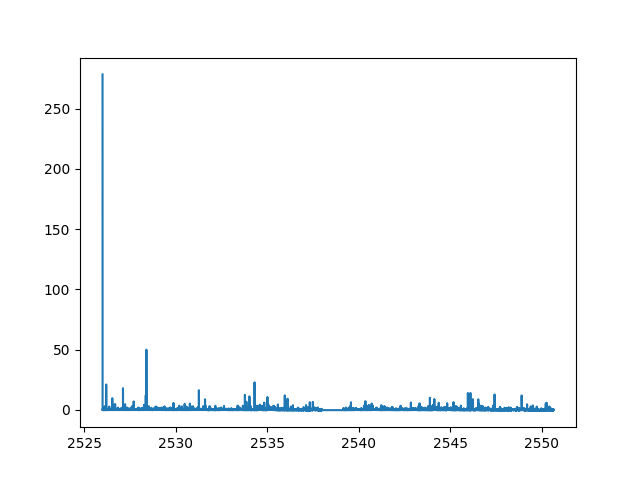

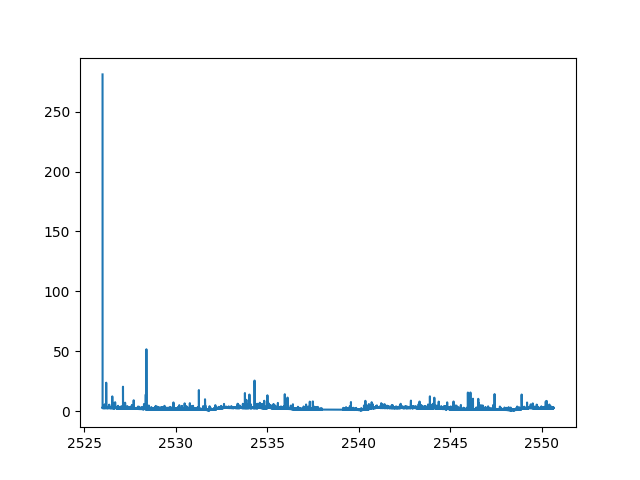

In [120]:
# Just an example of a lc with rr-lyrae like variability looks like
mytpf = flarenet.TessStar("TIC 61101267", sector=45, exptime=20, download_dir='tpfs/')
mytpf.get_metadata()
flares, params = mytpf.generate_flares(flare_fraction=0.1) 

threshold = (mytpf.lc_std / np.nanmedian(mytpf.lc.flux)).value
mytpf.get_flareArr(flares, threshold=threshold) 

mytpf.inject_flares(flares) # inject them onto the lc

#Plot before pulsations
fig, ax = plt.subplots(1)
plt.plot(mytpf.lc.time.value, mytpf.flux_with_flares)
plt.show()

mytpf.inject_rr_lyrae()
# Plot after pulsations
fig, ax = plt.subplots(1)
plt.plot(mytpf.lc.time.value, mytpf.flux_with_flares)
plt.show()

229639216

In [132]:
import glob
file_list = glob.glob('flarenet/training_data/injected_flares/*.csv')
len(file_list)

60

# Train a basic model without extra scaling of the data

This is a bit cumbersome at the moment. Basically you need to create a flarenet object. 
If you want to change the window size or data scaling, it needs to happen on initialization. This is so that the rest of the functions do the same thing (the training and testing have the same window length, for example.)

In [21]:
import flarenet

In [83]:
window_size=500
fn = flarenet.flarenet(verbose=True,
                      scaling = None,
                      #window_size = 500, 
                      )

# Create your training dataset. 
# The size of drop_frac matters for training. 
#    This sets the fraction of total data points to skip, so a bigger number means fewer training samples
fn.create_training_dataset(data_dir = 'training_data/injected_flares',
                                drop_frac=0.5, 
                                )
fn.training_files

Found 10 training files


['/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 281631335_31_1_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 4622906_60_1_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 276861788_34_2_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 55404385_64_1_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 60950167_45_2_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 4622906_60_2_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 276861788_34_1_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 281631335_31_2_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data

In [84]:
# This is just a check to see how the data generator works. This happens inside create_training_dataset

dataset = tf.data.Dataset.from_generator(
    lambda: fn._prepare_training_generator(fn.training_files),
    output_signature=(
        {
            "inputA": tf.TensorSpec(shape=(None, fn.window_size, 1), dtype=tf.float32)
        },
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

In [85]:
dataset

<_FlatMapDataset element_spec=({'inputA': TensorSpec(shape=(None, 500, 1), dtype=tf.float32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [86]:
#for sample in dataset.take(2):
#    print(sample)

In [28]:
# You can add a string to an existing keras model or it will generate a new model with the default parameters
# Note it is on you to make sure the data shapes are correct 
history = fn.train_model(epochs=2)

Generating new nn model


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputA (InputLayer)             │ (None, 500, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 500, 32)        │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 500, 32)        │        21,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 250, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 250, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 250, 64)        │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 250, 64)        │        28,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 125, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 125, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 125, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 125, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 63, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4032)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     2,064,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,286,817 (8.72 MB)

 Trainable params: 2,286,689 (8.72 MB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/2


/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: inputA. Received: the structure of inputs={'inputA': '*'}
  warnings.warn(


initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 281631335_31_1_data.csv
    522/Unknown 19s 34ms/step - accuracy: 0.9112 - loss: 0.2497initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 4622906_60_1_data.csv
    903/Unknown 33s 36ms/step - accuracy: 0.9126 - loss: 0.2414initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 276861788_34_2_data.csv
   1399/Unknown 52s 36ms/step - accuracy: 0.9139 - loss: 0.2346initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 55404385_64_1_data.csv
   2166/Unknown 80s 36ms/step - accuracy: 0.9042 - loss: 0.2484initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 60950167_45_2_data.csv
   2602/Unknown 98s 37ms/step - accuracy: 0.8993 - loss: 

/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


 523/5092 ━━━━━━━━━━━━━━━━━━━━ 2:59 39ms/step - accuracy: 0.9351 - loss: 0.1696initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 4622906_60_1_data.csv
 904/5092 ━━━━━━━━━━━━━━━━━━━━ 2:46 40ms/step - accuracy: 0.9357 - loss: 0.1657initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 276861788_34_2_data.csv
1399/5092 ━━━━━━━━━━━━━━━━━━━━ 2:25 39ms/step - accuracy: 0.9356 - loss: 0.1645initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 55404385_64_1_data.csv
2166/5092 ━━━━━━━━━━━━━━━━━━━━ 1:54 39ms/step - accuracy: 0.9243 - loss: 0.1822initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 60950167_45_2_data.csv
2603/5092 ━━━━━━━━━━━━━━━━━━━━ 1:36 39ms/step - accuracy: 0.9191 - loss: 0.1909initilizing generator for /Users/nthom/TESS_GI/gitNsc

/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [30]:
fn.model.save('alpha_test/alpha_test_noscaling_model.keras')

# Get a lightcurve to test on
Note this is just a sanity check, Need to implement proper validation and testing later. 
I have manually made this prediction file using the make_prediction_dataset() function. This is AU Mic

In [87]:
# These are the orbit files. These are CSV files that have split up a sector into 2 orbits and normalized flux. 
#     The training data orbit files have extra columns with the flux with flares, but not here.
test_o1 = pd.read_csv('flarenet/prediction_data/TIC 441420236_27_1_data.csv')
test_o2 = pd.read_csv('flarenet/prediction_data/TIC 441420236_27_2_data.csv')
test = pd.concat([test_o1, test_o2])
test.head()

,time,flux,flux_err,quality,crArr,normalized_flux
0,2036.283452,266033.59375,120.750626,0.0,0.0,-0.812225
1,2036.283684,266085.81250,120.773315,0.0,0.0,-0.792427
2,2036.283915,265954.62500,120.745430,0.0,0.0,-0.842165
3,2036.284147,265992.00000,120.746674,0.0,0.0,-0.827995
4,2036.284378,266262.90625,120.818077,0.0,0.0,-0.725284


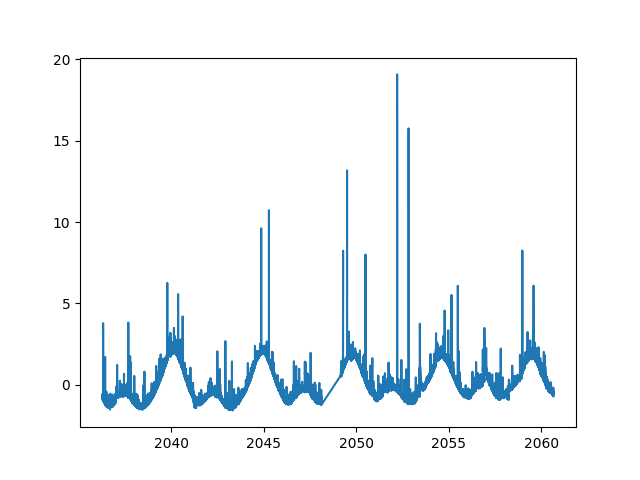

In [88]:
# Just taking a look at the lc. This is a very active star!
plt.figure()
plt.plot(test['time'], test['normalized_flux'])
plt.show()

In [89]:
# The predictions only happen on one orbit file at a time right now. This may be too confusing. 
fn.create_prediction_dataset('flarenet/prediction_data/TIC 441420236_27_1_data.csv')
fn.prediction_dataset # Just printing it to see the shapes. 

Making predictions for flarenet/prediction_data/TIC 441420236_27_1_data.csv 


<_FlatMapDataset element_spec=({'inputA': TensorSpec(shape=(1, 500, 1), dtype=tf.float32, name=None)},)>

In [90]:
# If you just trained a model, you don't actually have to pass a string to a model, but I am importing one I already trained here. 
fn.predict_with_model('alpha_test/alpha_test_noscaling_model.keras')

Loading model from alpha_test_noscaling_model.keras
initilizing generator for flarenet/prediction_data/TIC 441420236_27_1_data.csv
     70/Unknown 0s 1ms/step 

/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: inputA. Received: the structure of inputs={'inputA': '*'}
  warnings.warn(


51196/51196 ━━━━━━━━━━━━━━━━━━━━ 69s 1ms/step


2024-11-22 13:51:43.402531: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Here is where it gets really dicey. The model saves out a padded a filled lightcurve as a npy file. The predictions will be on this file as there are no gaps. 

In [91]:
# The prediction happens for every
pred_data = pd.read_csv('flarenet/prediction_data/nn_input/TIC 441420236_27_1_data.npy')
pred_data

,Unnamed: 0,time,flux,flux_err,quality,crArr,normalized_flux,filled,flareArr
0,498,2036.225813,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0
1,496,2036.226045,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0
2,494,2036.226276,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0
3,492,2036.226508,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0
4,490,2036.226739,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0
...,...,...,...,...,...,...,...,...,...
51691,491,2048.191157,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0
51692,493,2048.191389,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0
51693,495,2048.191620,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0
51694,497,2048.191852,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0


In [92]:
# No predictions happen on the first window_size/2 and last window_size/2 data points. 
# These are just padded for the model. If we didn't do this, we couldn't find flares at the start and end of the sectors. 
len(pred_data), len(fn.preds), sum(pred_data['filled'])

(51696, 51196, 547.0)

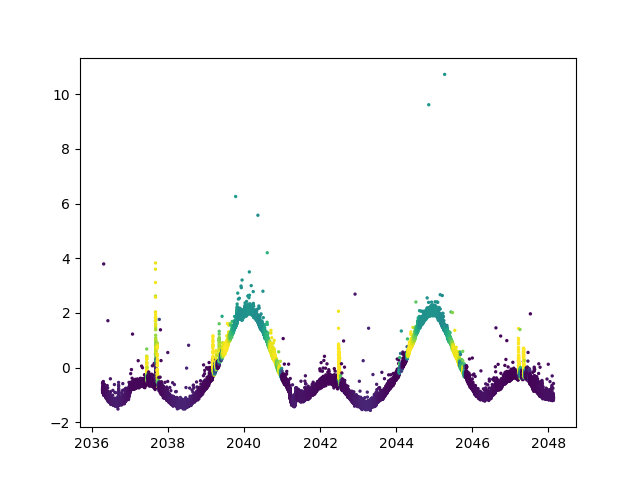

In [93]:
plt.figure()
# I'll have to better program this so users don't have to worry about this slicing confusion. 
plt.scatter(pred_data['time'].values[250:-250], pred_data['normalized_flux'].values[250:-250], c=fn.preds, s=2)
plt.show()

# Train a basic model with MinMaxScaling

I repeat the same code as above with different scaling. 

In [94]:
window_size=500
fn = flarenet.flarenet(verbose=True,
                      scaling = "MinMax",)
fn.create_training_dataset(data_dir = 'training_data/injected_flares',
                                drop_frac=0.5, 
                                )
fn.training_files

Found 10 training files


['/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 281631335_31_1_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 4622906_60_1_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 276861788_34_2_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 55404385_64_1_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 60950167_45_2_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 4622906_60_2_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 276861788_34_1_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 281631335_31_2_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data

In [45]:
fn.build_nn_model()
history = fn.train_model(epochs=2)
fn.model.save('alpha_test/alpha_test_minmaxscaling_model.keras')

Generating new nn model


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputA (InputLayer)             │ (None, 500, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 500, 32)        │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 500, 32)        │        21,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 250, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 250, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 250, 64)        │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 250, 64)        │        28,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 125, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 125, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_22 (Conv1D)              │ (None, 125, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_23 (Conv1D)              │ (None, 125, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 63, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4032)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     2,064,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,286,817 (8.72 MB)

 Trainable params: 2,286,689 (8.72 MB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/2


/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: inputA. Received: the structure of inputs={'inputA': '*'}
  warnings.warn(


initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 281631335_31_1_data.csv
    523/Unknown 19s 34ms/step - accuracy: 0.8001 - loss: 0.4177initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 4622906_60_1_data.csv
    904/Unknown 32s 34ms/step - accuracy: 0.8251 - loss: 0.3760initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 276861788_34_2_data.csv
   1399/Unknown 51s 36ms/step - accuracy: 0.8417 - loss: 0.3458initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 55404385_64_1_data.csv
   2165/Unknown 78s 36ms/step - accuracy: 0.8480 - loss: 0.3348initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 60950167_45_2_data.csv
   2603/Unknown 94s 36ms/step - accuracy: 0.8492 - loss: 

/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


 523/5092 ━━━━━━━━━━━━━━━━━━━━ 2:46 36ms/step - accuracy: 0.8829 - loss: 0.2903initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 4622906_60_1_data.csv
 904/5092 ━━━━━━━━━━━━━━━━━━━━ 2:32 36ms/step - accuracy: 0.8975 - loss: 0.2574initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 276861788_34_2_data.cs
1399/5092 ━━━━━━━━━━━━━━━━━━━━ 2:14 36ms/step - accuracy: 0.9061 - loss: 0.2361initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 55404385_64_1_data.csv
2165/5092 ━━━━━━━━━━━━━━━━━━━━ 1:46 36ms/step - accuracy: 0.9056 - loss: 0.2332initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 60950167_45_2_data.csv
2601/5092 ━━━━━━━━━━━━━━━━━━━━ 1:29 36ms/step - accuracy: 0.9046 - loss: 0.2340initilizing generator for /Users/nthom/TESS_GI/gitNsch

/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [95]:
fn.create_prediction_dataset('flarenet/prediction_data/TIC 441420236_27_1_data.csv')
fn.predict_with_model('alpha_test/alpha_test_minmaxscaling_model.keras')

Making predictions for flarenet/prediction_data/TIC 441420236_27_1_data.csv 
Loading model from alpha_test_minmaxscaling_model.keras
initilizing generator for flarenet/prediction_data/TIC 441420236_27_1_data.csv
    111/Unknown 0s 1ms/step

/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: inputA. Received: the structure of inputs={'inputA': '*'}
  warnings.warn(


51196/51196 ━━━━━━━━━━━━━━━━━━━━ 68s 1ms/step


/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-11-22 13:54:55.657122: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


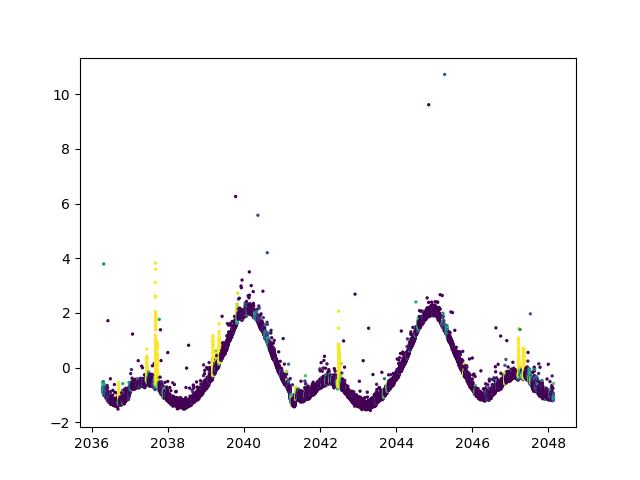

In [96]:
pred_data = pd.read_csv(fn.prediction_file)
plt.figure()
plt.scatter(pred_data['time'].values[250:-250], pred_data['normalized_flux'].values[250:-250], c=fn.preds, s=2)
plt.show()

# Train a basic model with Robust Scaling

In [97]:
window_size=500
fn = flarenet.flarenet(verbose=True,
                      scaling = "Robust",)
fn.create_training_dataset(data_dir = 'training_data/injected_flares',
                                drop_frac=0.5, 
                                )
fn.training_files

Found 10 training files


['/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 281631335_31_1_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 4622906_60_1_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 276861788_34_2_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 55404385_64_1_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 60950167_45_2_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 4622906_60_2_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 276861788_34_1_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 281631335_31_2_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data

In [98]:
fn.build_nn_model()
history = fn.train_model(epochs=2)
fn.model.save('alpha_test/alpha_test_robustscaling_model.keras')

Generating new nn model


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputA (InputLayer)             │ (None, 500, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 500, 32)        │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 500, 32)        │        21,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 250, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 250, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 250, 64)        │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 250, 64)        │        28,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 125, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 125, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 125, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 125, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 63, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4032)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     2,064,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,286,817 (8.72 MB)

 Trainable params: 2,286,689 (8.72 MB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/2


/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: inputA. Received: the structure of inputs={'inputA': '*'}
  warnings.warn(


initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 281631335_31_1_data.csv
    523/Unknown 18s 32ms/step - accuracy: 0.8566 - loss: 0.3612initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 4622906_60_1_data.csv
    902/Unknown 30s 32ms/step - accuracy: 0.8747 - loss: 0.3170initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 276861788_34_2_data.csv
   1399/Unknown 47s 33ms/step - accuracy: 0.8864 - loss: 0.2876initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 55404385_64_1_data.csv
   2165/Unknown 74s 33ms/step - accuracy: 0.8879 - loss: 0.2794initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 60950167_45_2_data.csv
   2603/Unknown 89s 34ms/step - accuracy: 0.8871 - loss: 

/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


 523/5092 ━━━━━━━━━━━━━━━━━━━━ 2:45 36ms/step - accuracy: 0.9352 - loss: 0.1948initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 4622906_60_1_data.csv
 903/5092 ━━━━━━━━━━━━━━━━━━━━ 2:32 36ms/step - accuracy: 0.9430 - loss: 0.1667initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 276861788_34_2_data.csv
1398/5092 ━━━━━━━━━━━━━━━━━━━━ 2:14 37ms/step - accuracy: 0.9470 - loss: 0.1514initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 55404385_64_1_data.csv
2167/5092 ━━━━━━━━━━━━━━━━━━━━ 1:46 36ms/step - accuracy: 0.9434 - loss: 0.1538initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 60950167_45_2_data.cs
2603/5092 ━━━━━━━━━━━━━━━━━━━━ 1:29 36ms/step - accuracy: 0.9417 - loss: 0.1556initilizing generator for /Users/nthom/TESS_GI/gitNsch

2024-11-22 14:04:33.511957: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [99]:
fn.create_prediction_dataset('flarenet/prediction_data/TIC 441420236_27_1_data.csv')
fn.predict_with_model('alpha_test/alpha_test_robustscaling_model.keras')

Making predictions for flarenet/prediction_data/TIC 441420236_27_1_data.csv 
Loading model from alpha_test_robustscaling_model.keras
initilizing generator for flarenet/prediction_data/TIC 441420236_27_1_data.csv
     92/Unknown 0s 2ms/step

/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: inputA. Received: the structure of inputs={'inputA': '*'}
  warnings.warn(


51196/51196 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step


/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


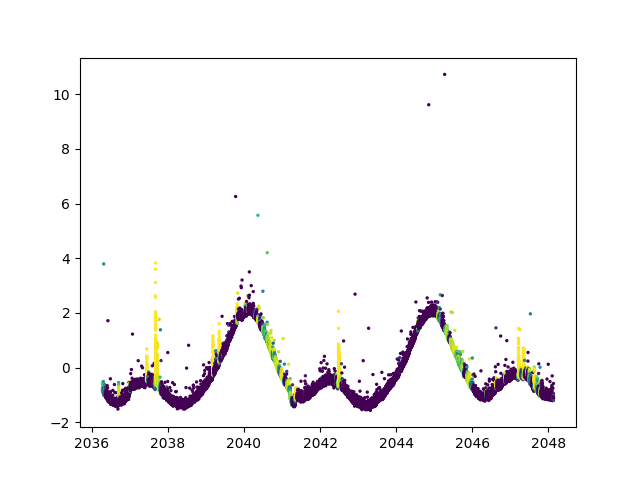

In [100]:
pred_data = pd.read_csv(fn.prediction_file)
plt.figure()
plt.scatter(pred_data['time'].values[250:-250], pred_data['normalized_flux'].values[250:-250], c=fn.preds, s=2)
plt.show()

# Fit a basic model with Quantile Scaling

In [106]:
window_size=500
fn = flarenet.flarenet(verbose=True,
                      scaling = "Quantile",)
fn.create_training_dataset(data_dir = 'training_data/injected_flares',
                                drop_frac=0.5, 
                                )
fn.training_files

Found 10 training files


['/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 281631335_31_1_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 4622906_60_1_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 276861788_34_2_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 55404385_64_1_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 60950167_45_2_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 4622906_60_2_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 276861788_34_1_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 281631335_31_2_data.csv',
 '/Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data

In [107]:
fn.build_nn_model()
history = fn.train_model(epochs=2)
fn.model.save('alpha_test/alpha_test_quantilescaling_model.keras')

Generating new nn model


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputA (InputLayer)             │ (None, 500, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_42 (Conv1D)              │ (None, 500, 32)        │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_43 (Conv1D)              │ (None, 500, 32)        │        21,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_21 (MaxPooling1D) │ (None, 250, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 250, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_44 (Conv1D)              │ (None, 250, 64)        │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_45 (Conv1D)              │ (None, 250, 64)        │        28,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_22 (MaxPooling1D) │ (None, 125, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 125, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_46 (Conv1D)              │ (None, 125, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_47 (Conv1D)              │ (None, 125, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_23 (MaxPooling1D) │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 63, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4032)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │     2,064,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,286,817 (8.72 MB)

 Trainable params: 2,286,689 (8.72 MB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/2


/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: inputA. Received: the structure of inputs={'inputA': '*'}
  warnings.warn(


initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 281631335_31_1_data.csv
    519/Unknown 20s 36ms/step - accuracy: 0.8700 - loss: 0.3063initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 4622906_60_1_data.csv
    904/Unknown 34s 36ms/step - accuracy: 0.8875 - loss: 0.2692initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 276861788_34_2_data.csv
   1401/Unknown 51s 35ms/step - accuracy: 0.8994 - loss: 0.2433initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 55404385_64_1_data.csv
   2171/Unknown 77s 35ms/step - accuracy: 0.9019 - loss: 0.2360initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 60950167_45_2_data.csv
   2606/Unknown 93s 35ms/step - accuracy: 0.9027 - loss: 

/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


 520/5092 ━━━━━━━━━━━━━━━━━━━━ 2:57 39ms/step - accuracy: 0.9460 - loss: 0.1658initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 4622906_60_1_data.csv
 898/5092 ━━━━━━━━━━━━━━━━━━━━ 2:39 38ms/step - accuracy: 0.9535 - loss: 0.1403initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 276861788_34_2_data.csv
1386/5092 ━━━━━━━━━━━━━━━━━━━━ 2:18 37ms/step - accuracy: 0.9567 - loss: 0.1279initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 55404385_64_1_data.csv
2157/5092 ━━━━━━━━━━━━━━━━━━━━ 1:48 37ms/step - accuracy: 0.9551 - loss: 0.1283initilizing generator for /Users/nthom/TESS_GI/gitNschanch/flarenet/src/flarenet/training_data/injected_flares/TIC 60950167_45_2_data.csv
2594/5092 ━━━━━━━━━━━━━━━━━━━━ 1:31 37ms/step - accuracy: 0.9545 - loss: 0.1286initilizing generator for /Users/nthom/TESS_GI/gitNsc

/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [108]:
fn.create_prediction_dataset('flarenet/prediction_data/TIC 441420236_27_1_data.csv')
fn.predict_with_model('alpha_test/alpha_test_quantilescaling_model.keras')

Making predictions for flarenet/prediction_data/TIC 441420236_27_1_data.csv 
Loading model from alpha_test_quantilescaling_model.keras
initilizing generator for flarenet/prediction_data/TIC 441420236_27_1_data.csv
     63/Unknown 0s 2ms/step

/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: inputA. Received: the structure of inputs={'inputA': '*'}
  warnings.warn(


51196/51196 ━━━━━━━━━━━━━━━━━━━━ 78s 2ms/step


/Users/nthom/opt/anaconda3/envs/flarenet/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-11-22 15:10:45.661309: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


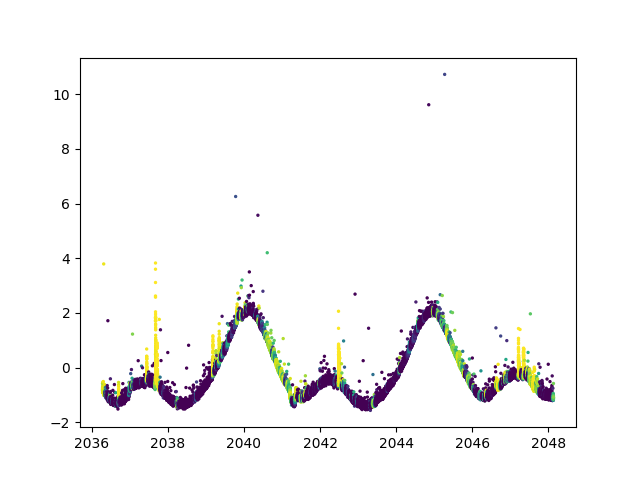

In [110]:
pred_data = pd.read_csv(fn.prediction_file)
plt.figure()
plt.scatter(pred_data['time'].values[250:-250], pred_data['normalized_flux'].values[250:-250], c=fn.preds, s=2)
plt.show()

# Just playing around with Brian's pulsation and ll lyrae functions before implementing them

In [8]:

pred_data

,Unnamed: 0,time,flux,flux_err,quality,crArr,normalized_flux,filled,flareArr
0,498,2036.225813,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0
1,496,2036.226045,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0
2,494,2036.226276,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0
3,492,2036.226508,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0
4,490,2036.226739,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0
...,...,...,...,...,...,...,...,...,...
51691,491,2048.191157,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0
51692,493,2048.191389,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0
51693,495,2048.191620,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0
51694,497,2048.191852,266638.71875,121.158333,128.0,0.0,-0.582798,1.0,0.0


In [61]:
def stellar_pulsations(t):
    periods = np.random.uniform(0.1, 5, size=3)
    amplitudes = np.random.uniform(0.01, 0.1, size=3)
    phases = np.random.uniform(0, 2*np.pi, size=3)

    signal = np.zeros_like(t)
    for period, amplitude, phase in zip(periods, amplitudes, phases):
        signal += amplitude * np.sin(2 * np.pi * (t / period + phase))
    signal = 1 + signal
    signal /= np.median(signal)
    return signal



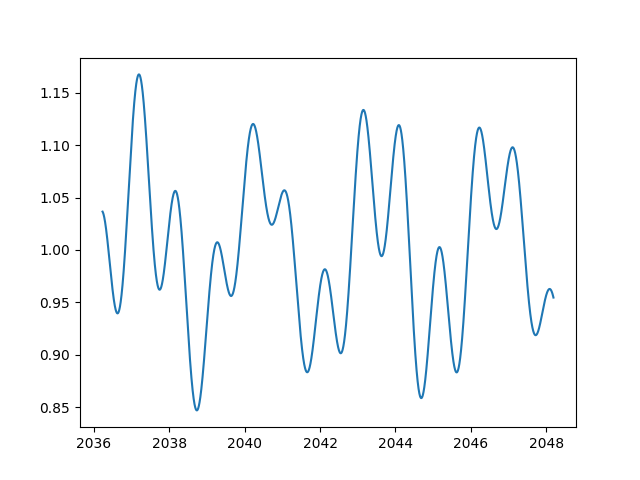

In [63]:
s = stellar_pulsations(pred_data['time'].values)
plt.figure()
plt.plot(pred_data['time'].values, s)
plt.show()


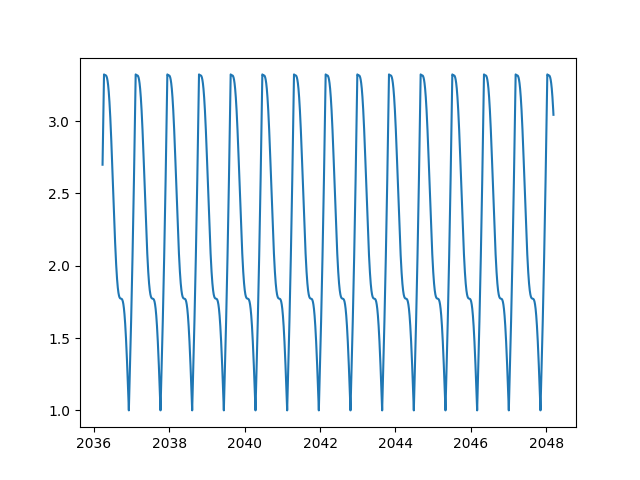

In [57]:
def rr_lyrae(t):
    """
    Simulate an RR Lyrae variable star light curve.
    Parameters:
    t (array): Time array
    period (float): Pulsation period in days
    amplitude (float): Amplitude of the variation
    rise_fraction (float): Fraction of the period spent in the rising phase
    phase_offset (float): Phase offset for the pulsation
    Returns:
    array: Simulated RR Lyrae light curve
    """
    period =  np.random.uniform(0.5, 35),
    amplitude = np.random.uniform(0.1, 0.5)
    rise_fraction = np.random.uniform(0.1, 0.3)
    phase_offset = np.random.uniform(0, 1)

    
    phase = ((t / period) + phase_offset) % 1
    signal = np.zeros_like(t)
    # Rising phase (usually steeper)
    rising = phase < rise_fraction
    signal[rising] = amplitude * (phase[rising] / rise_fraction)
    # Falling phase
    falling = ~rising
    signal[falling] = amplitude * (1 - ((phase[falling] - rise_fraction) / (1 - rise_fraction)))
    # Add some asymmetry and non-linearity to make it more realistic
    signal = signal - 0.1 * amplitude * np.sin(4 * np.pi * phase)
    # Normalize around 1
    signal = signal / np.median(signal) + 1
    return signal

# https://www.sciencedirect.com/topics/physics-and-astronomy/rr-lyrae-variable-stars#:~:text=IV.,-A.&text=They%20range%20in%20period%20from,range%200.3%20to%201%20magnitude.
# They range in period from 0.5 to 35 days and have amplitudes in the range 0.3 to 1 magnitude.

s = rr_lyrae(pred_data['time'].values)
plt.figure()
plt.plot(pred_data['time'].values, s)
plt.show()

2041.3995681367776 0.17063347453030356 0.1751521139976234


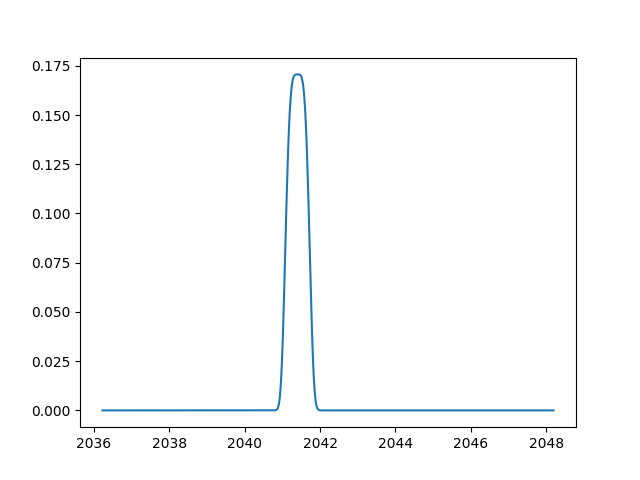

In [81]:
def asteroid_sim(t):
    """
    Simulate an asteroid passing in front of a star in TESS.
    Parameters:
    t (array): Time array
    """
    # Ranges loosely based on https://iopscience.iop.org/article/10.3847/1538-4357/ace9df
    amp = np.random.uniform(0.01, 0.2)
    sig = np.random.uniform(0.01, .2)
    t_mid = np.random.choice(t)
    
    #signal = amp * np.exp(-((t - t_mid) ** 2) / (2 * sig ** 2)) # Regular gaussian
    # Make a 'flat-top' gaussian instead
    signal = amp * np.exp(-((t - t_mid) / (2 * sig))**4)
    #print(t_mid, amp, sig)
    return signal




s = asteroid_sim(pred_data['time'].values)
plt.figure()
plt.plot(pred_data['time'].values, s)
plt.show()


2043.724624563119 0.09637948804455443 0.06307127140853988


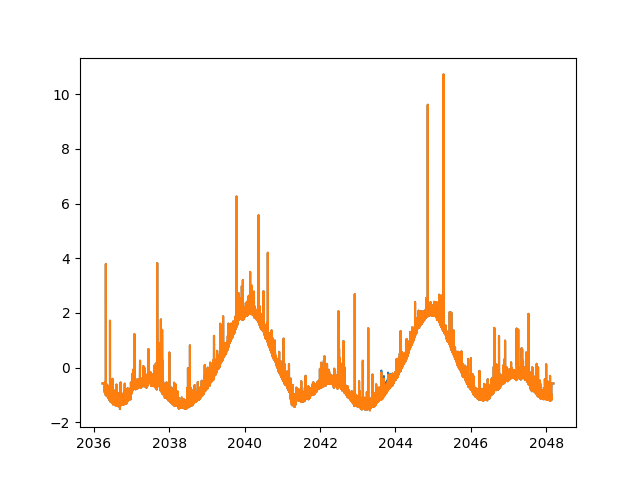

In [82]:
s = asteroid_sim(pred_data['time'].values)
plt.figure()
plt.plot(pred_data['time'].values, pred_data['normalized_flux'].values+s)
plt.plot(pred_data['time'].values, pred_data['normalized_flux'].values)

plt.show()